In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'real-estate-365520' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=real-estate-365520:US:bquxjob_7c2aa7fb_184b0e30409)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7c2aa7fb_184b0e30409') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM
ML.PREDICT(MODEL `real-estate-365520.redfin_dataset.linearreg_statemodel`,
(
SELECT
 inventory,
 CAST(state as STRING) as state, #state is a category, not a #.
 median_ppsf,
 homes_sold,
 median_sale_price
FROM
  `real-estate-365520.redfin_dataset.redfin_state`
WHERE
  median_sale_price IS NOT NULL)
)



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7c2aa7fb_184b0e30409') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,predicted_median_sale_price,inventory,state,median_ppsf,homes_sold,median_sale_price
0,224142.294224,1014.0,Alabama,229.0,357,250900
1,229516.480206,859.0,Alabama,309.0,432,290600
2,230673.230746,516.0,Alabama,325.0,368,375600
3,221096.509568,802.0,Alabama,192.0,189,267800
4,228818.517534,923.0,Alabama,283.0,513,345000
...,...,...,...,...,...,...
21345,186256.080479,612.0,West Virginia,151.0,358,268900
21346,229453.189955,20590.0,Michigan,151.0,13341,229900
21347,195704.918949,10414.0,Wisconsin,151.0,4064,243000
21348,274006.830324,7508.0,Minnesota,151.0,7029,282900


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,predicted_median_sale_price,inventory,median_ppsf,homes_sold,median_sale_price
count,2.135000e+04,21350.000000,21350.000000,21350.000000,2.135000e+04
mean,2.767483e+05,10130.372787,173.415831,3254.163185,2.768788e+05
std,1.173414e+05,17184.060266,232.595907,5521.442056,1.474720e+05
min,4.365826e+04,3.000000,12.000000,1.000000,2.500000e+04
25%,1.982461e+05,602.250000,108.000000,211.000000,1.828000e+05
50%,2.360377e+05,2483.000000,140.000000,830.500000,2.334000e+05
75%,3.282484e+05,12811.000000,197.000000,4272.000000,3.281000e+05
max,1.752728e+06,152315.000000,29585.000000,51470.000000,2.165000e+06


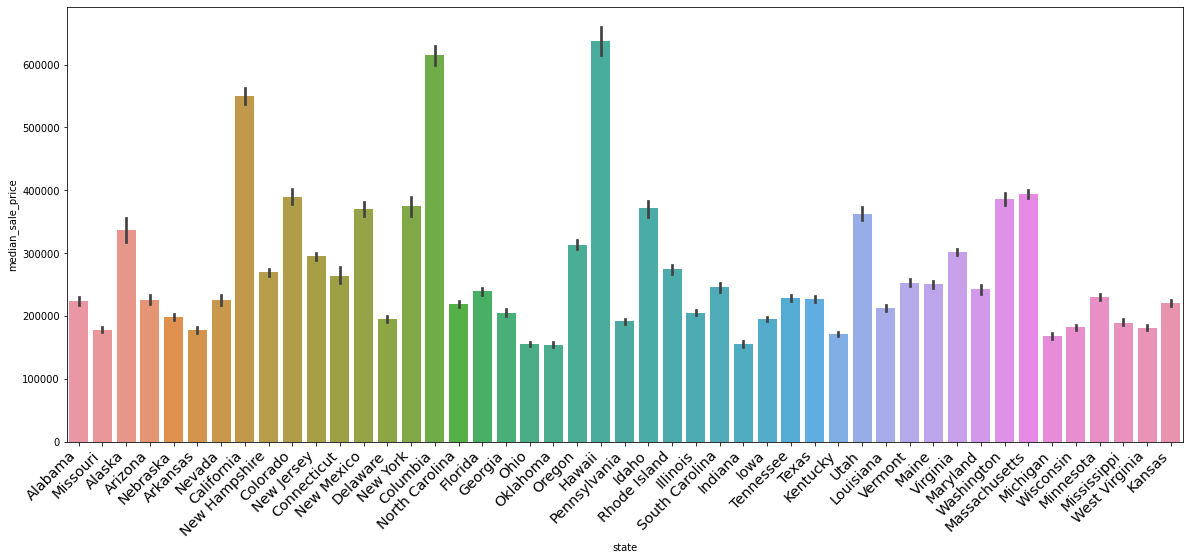

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = 'state',y = 'median_sale_price',data = results)

plt.show()

##Predicted Results

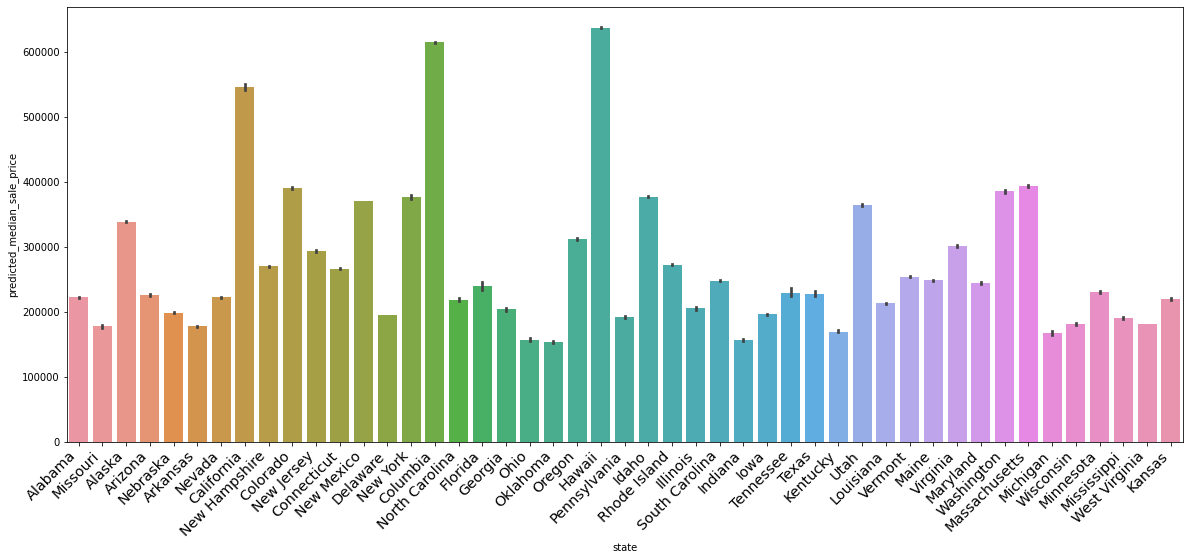

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot(x = 'state',y = 'predicted_median_sale_price',data = results)

plt.show()